In [20]:
import warnings
warnings.filterwarnings('always') 

In [49]:
import numpy as np
import pandas as pd

import os


import keras
import keras.utils
from keras import utils as np_utils

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# # For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow_hub as hub

import pathlib

from keras.callbacks import ModelCheckpoint, EarlyStopping
print(tf.__version__)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

2.16.1


In [22]:
#Import dataset
for dirname, _, filenames in os.walk('/Applications/code/computer_vision/final_project/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Applications/code/computer_vision/final_project/Dataset/.DS_Store
/Applications/code/computer_vision/final_project/Dataset/Car/Image_15.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_29.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_28.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_14.JPG
/Applications/code/computer_vision/final_project/Dataset/Car/Image_17.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_13.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_12.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_38.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_11.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_39.jpg
/Applications/code/computer_vision/final_project/Dataset/Car/Image_89.png
/Applications/code/computer_vision/final_project/Dataset/Car/Image_76.jpg
/Applications/code/computer_vision/final_proj

In [23]:
data_dir = "/Applications/code/computer_vision/final_project/Dataset" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/Applications/code/computer_vision/final_project/Dataset')

In [25]:
# Load cheetah and lion images and their respective labels
Bus = list(data_dir.glob('Bus/*'))
Car = list(data_dir.glob('Car/*'))
minivan = list(data_dir.glob('minivan/*'))
motorbike = list(data_dir.glob('motorbike/*'))
pickup = list(data_dir.glob('pickup/*'))
scooter = list(data_dir.glob('scooter/*'))
Truck = list(data_dir.glob('Truck/*'))
van = list(data_dir.glob('van/*'))


print("Length of Bus: ", len(Bus))
print("Length of Car: ", len(Car))
print("Length of minivan: ", len(minivan))
print("Length of motorbike: ", len(motorbike))
print("Length of pickup: ", len(pickup))
print("Length of scooter: ", len(scooter))
print("Length of Truck: ", len(Truck))
print("Length of van: ", len(van))

Length of Bus:  101
Length of Car:  100
Length of minivan:  100
Length of motorbike:  100
Length of pickup:  100
Length of scooter:  100
Length of Truck:  100
Length of van:  100


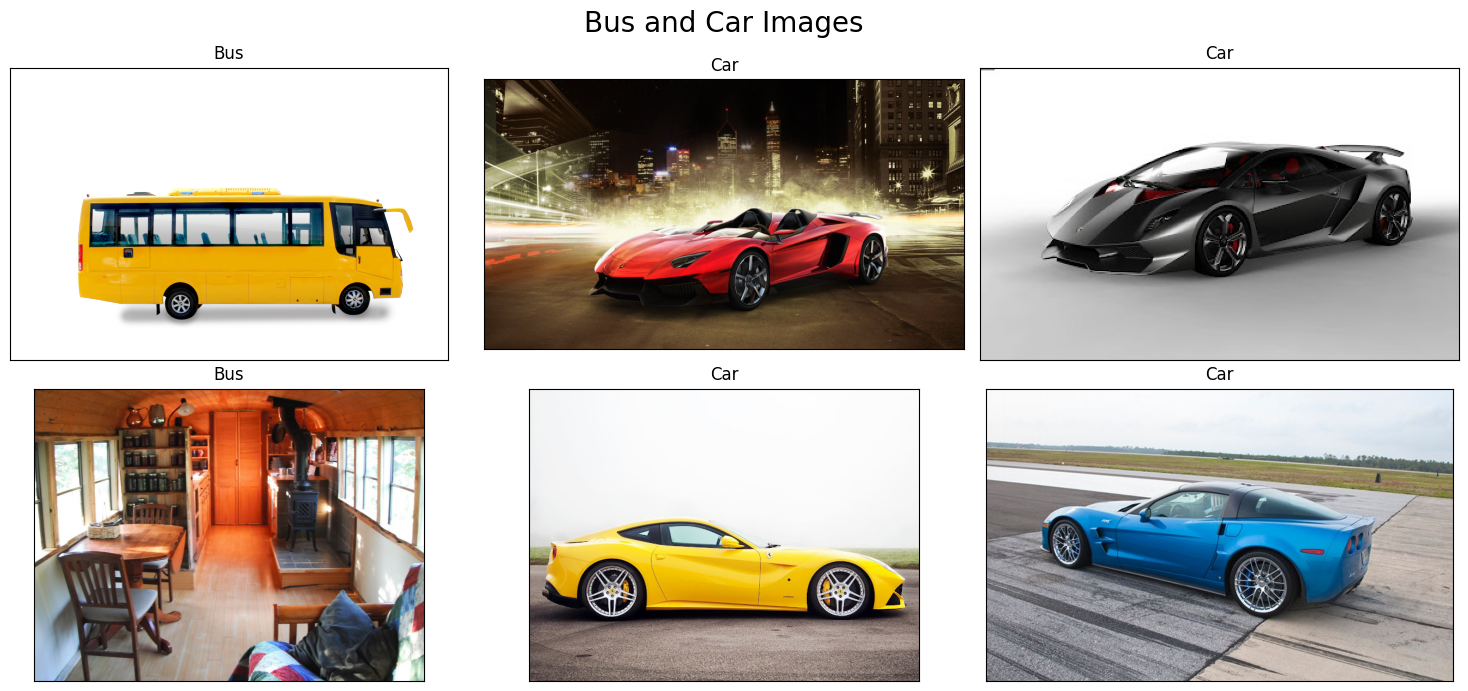

In [26]:
import matplotlib.pyplot as plt
import random
#Display 20 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

# Display a mix of cheetah and lion images
for i, ax in enumerate(axes.flat):
    if random.random() < 0.5:
        image = plt.imread(random.choice(Car))
        ax.imshow(image)
        ax.set_title('Car')
    else:
        image = plt.imread(random.choice(Bus))
        ax.imshow(image)
        ax.set_title('Bus')

plt.suptitle('Bus and Car Images', fontsize=20)
plt.tight_layout()
plt.show()

In [13]:
# contains the images path

df_images = {
    'Car' : Car,
    'Bus' : Bus,
    'minivan' : minivan,
    'motorbike': motorbike,
    'pickup' : pickup,
    'scooter' : scooter,
    'Truck':Truck,
    'van': van
}

# contains numerical labels for the categories
df_labels = {
    'Car' : 0,
    'Bus' : 1,
    'minivan' : 2,
    'motorbike': 3,
    'pickup' : 4,
    'scooter' : 5,
    'Truck':6,
    'van': 7
}

In [41]:
import cv2

resized_images = {} # เก็บรูปภาพที่ถูกปรับขนาด

for key, images in df_images.items():
    resized_images[key] = []
    for image_path in images:
        img = cv2.imread('/Applications/code/computer_vision/final_project/Dataset')  # โหลดรูปภาพ
        if img is not None:
            img_resized = cv2.resize(img, (224, 224))  # ปรับขนาดรูปภาพเป็น 224x224 pixels
            resized_images[key].append(img_resized)
        else:
            print(f"Error: Failed to load image - {image_path}")

# จำนวนรูปที่ถูกปรับขนาดสำหรับแต่ละ class
for key, images in resized_images.items():
    print(f"Number of resized images for {key}: {len(images)}")

Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_15.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_29.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_28.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_14.JPG
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_17.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_13.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_12.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_38.jpg
Error: Failed to load image - /Applications/code/computer_vision/final_project/Dataset/Car/Image_11.jpg
Error: Failed to load image - /Applications/code/computer_vision

In [44]:
from PIL import Image

# ฟังก์ชันสำหรับปรับขนาดรูปภาพและบันทึกรูปภาพใหม่
def resize_and_save_images(input_path, output_path):
    for i in range(1, 101):  # Image_1 ถึง Image_100
        for extension in ["jpeg", "jpg", "JPG","png","PNG"]:
            img_path = f"{input_path}/Image_{i}.{extension}"
            if os.path.exists(img_path):
                img = Image.open(img_path)
                img = img.convert('RGB')  # แปลงเป็นโหมด RGB
                img_resized = img.resize((224, 224))  # ปรับขนาดรูปภาพเป็น 224x224 pixels
                output_img_path = f"{output_path}/Image_{i}_resized.jpg"
                img_resized.save(output_img_path)


# ปรับขนาดรูปภาพสำหรับ Car
resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/Car", "/Applications/code/computer_vision/final_project/Dataset_train/Car")

# ปรับขนาดรูปภาพสำหรับ Bus
resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/Bus", "/Applications/code/computer_vision/final_project/Dataset_train/Bus")

# ปรับขนาดรูปภาพสำหรับ minivan
resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/minivan", "/Applications/code/computer_vision/final_project/Dataset_train/minivan")

resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/motorbike", "/Applications/code/computer_vision/final_project/Dataset_train/motorbike")

resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/pickup", "/Applications/code/computer_vision/final_project/Dataset_train/pickup")

resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/scooter", "/Applications/code/computer_vision/final_project/Dataset_train/scooter")

resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/Truck", "/Applications/code/computer_vision/final_project/Dataset_train/Truck")

resize_and_save_images("/Applications/code/computer_vision/final_project/Dataset/van", "/Applications/code/computer_vision/final_project/Dataset_train/van")


In [45]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

[ WARN:0@126814.106] global loadsave.cpp:248 findDecoder imread_('/Applications/code/computer_vision/final_project/Dataset/motorcycle/Image_15.png'): can't open/read file: check file path/integrity


error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [46]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

# CNN

In [50]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [131]:
# num_label = 2 # number of labels

# model = keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.Flatten(),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(num_label)
# ])

# model.summary()

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Lambda
import tensorflow_hub as hub

num_label = 8  # จำนวนของ label

# โหลด MobileNet จาก TensorFlow Hub
mobile_net = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4")

# สร้าง Lambda Layer เพื่อแปลง KerasLayer เป็น Layer ที่ใช้ใน Sequential model
lambda_layer = Lambda(lambda x: mobile_net(x))

# กำหนดโมเดล CNN
model = Sequential()
model.add(lambda_layer)
model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_label, activation='softmax'))

model.build(input_shape=(None, 224, 224, 3))  # กำหนด input shape ของโมเดล
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 224)            │       224,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 8)              │         1,800 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,248 (883.78 KB)

 Trainable params: 226,248 (883.78 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size = 0.75, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((150, 224, 224, 3),
 (13, 224, 224, 3),
 (37, 224, 224, 3),
 (150,),
 (13,),
 (37,))

In [67]:
model.compile(
#   optimizer = tf.keras.optimizers.SGD(learning_rate =  0.001),
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [68]:
early_stopping = EarlyStopping(monitor='val_loss', 
                               mode='min', 
                               patience=25, 
                               verbose=1)
mc = ModelCheckpoint ('best_model.h5',
                      monitor='val_loss',
                      mode='min', 
                      save_best_only=True)
history = model.fit(X_train,
                    y_train, 
                    epochs=150, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping, mc])


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [154]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 318ms/step - loss: 0.3134 - acc: 0.9467


[0.3134196996688843, 0.9466666579246521]

In [155]:
import numpy as np

# Predict the class labels of the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Count the number of examples in each class
counts = np.bincount(y_test)
print('Number of examples in each class:', counts)

# Count the number of correct predictions in each class
correct_counts = np.bincount(y_test[y_pred == y_test], minlength=len(counts))
print('Number of correct predictions in each class:', correct_counts)


3/3 [==============================] - 1s 309ms/step
Number of examples in each class: [37 38]
Number of correct predictions in each class: [34 37]


In [156]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

2/2 [==============================] - 1s 187ms/step
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.93      0.97      0.95        38

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [157]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

In [158]:
loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()

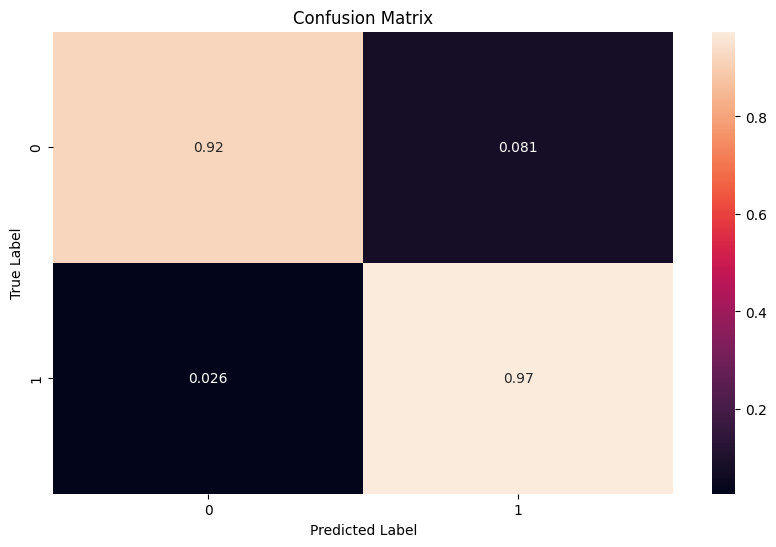

In [159]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#0 = cheetah, 1 = Lion


cf_matrix = confusion_matrix(y_test, y_pred_bool, normalize='true')
plt.figure(figsize = (10,6))

sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 [==============================] - 0s 172ms/step


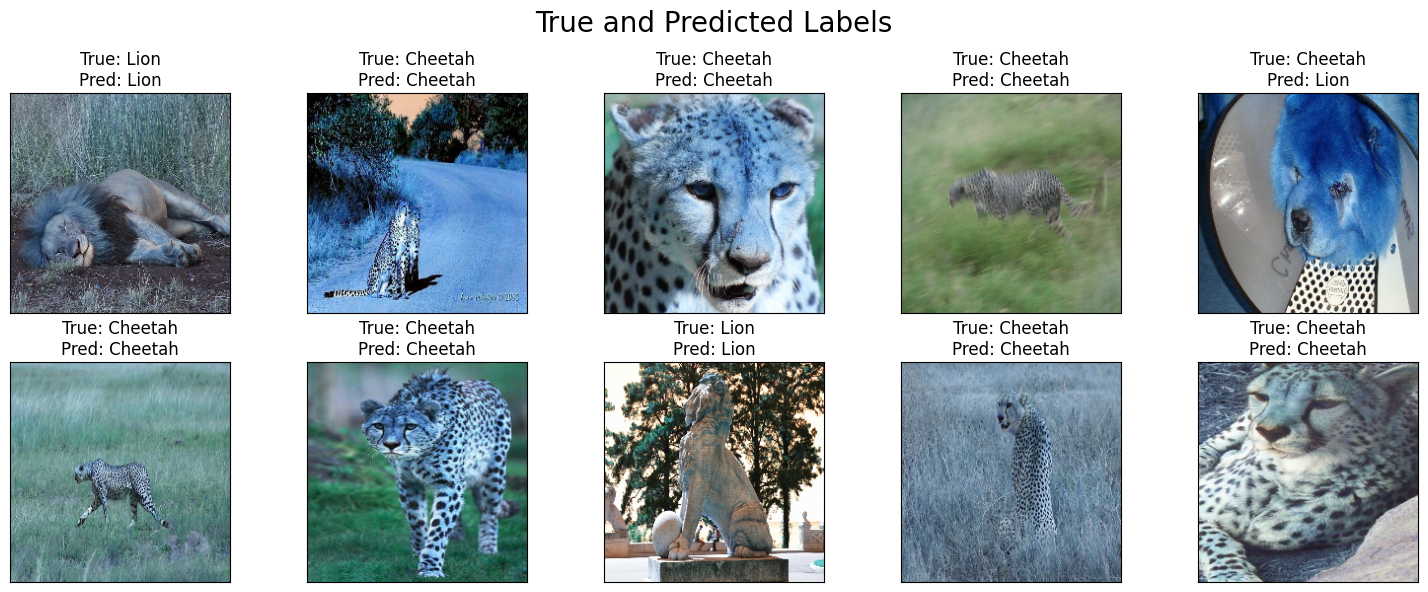

In [160]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Choose a random sample of 10 images from the test set
num_samples = 10
sample_indices = random.sample(range(len(X_test)), num_samples)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions on the sample images
y_pred = model.predict(sample_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Display the sample images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < num_samples:
        ax.imshow(sample_images[i])
        true_label = 'Cheetah' if sample_labels[i] == 0 else 'Lion'
        pred_label = 'Cheetah' if y_pred_labels[i] == 0 else 'Lion'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}')
        
plt.suptitle('True and Predicted Labels', fontsize=20)
plt.tight_layout()
plt.show()


In [106]:
# IMG_shape = (224, 224, 3)
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_shape,
#                                                include_top=False,
#                                                weights='imagenet')

In [107]:
# base_model.summary()

# SVM Model

In [108]:
# # Create an SVM model
# svm = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))

# # Train the model
# svm.fit(X_train.reshape(len(X_train), -1), y_train)

In [109]:
# # Evaluate the model
# svm_score = svm.score(X_test.reshape(len(X_test), -1), y_test)
# print(f'SVM Accuracy: {svm_score}')
# model.summary()

# Mobile net Models

In [161]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, train_size = 0.75, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, random_state=42)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((300, 224, 224, 3),
 (25, 224, 224, 3),
 (75, 224, 224, 3),
 (300,),
 (25,),
 (75,))

In [162]:
tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax',
)

In [163]:
import tensorflow as tf
import tensorflow_hub as hub


mobile_net_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # latest version of MobileNetv2
mobile_net = hub.KerasLayer(mobile_net_url, input_shape=(224,224,3), trainable=False) # Removing the last layer


In [164]:
num_label = 2 # number of labels

## Define the CNN model

model = keras.Sequential([
    mobile_net,
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_label)
])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_15 (Dropout)        (None, 1280)              0         
                                                                 
 dense_49 (Dense)            (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [165]:
from tensorflow.keras.optimizers.legacy import Adam


# ##==============Net====================
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=25, verbose=1)
mc = ModelCheckpoint ('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_val, y_val), callbacks=[early_stopping, mc]) 


Epoch 1/150
10/10 [==============================] - 8s 515ms/step - loss: 0.6121 - acc: 0.6900 - val_loss: 0.2295 - val_acc: 0.9200
Epoch 2/150
10/10 [==============================] - 5s 491ms/step - loss: 0.2316 - acc: 0.9200 - val_loss: 0.1445 - val_acc: 0.9600
Epoch 3/150
10/10 [==============================] - 5s 520ms/step - loss: 0.1384 - acc: 0.9467 - val_loss: 0.1432 - val_acc: 0.9600
Epoch 4/150
10/10 [==============================] - 5s 476ms/step - loss: 0.0993 - acc: 0.9767 - val_loss: 0.1629 - val_acc: 0.9600
Epoch 5/150
10/10 [==============================] - 5s 502ms/step - loss: 0.0963 - acc: 0.9600 - val_loss: 0.1600 - val_acc: 0.9600
Epoch 6/150
10/10 [==============================] - 5s 467ms/step - loss: 0.0789 - acc: 0.9767 - val_loss: 0.1669 - val_acc: 0.9600
Epoch 7/150
10/10 [==============================] - 5s 468ms/step - loss: 0.0705 - acc: 0.9867 - val_loss: 0.1597 - val_acc: 0.9600
Epoch 8/150
10/10 [==============================] - 5s 451ms/step - 

In [403]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 273ms/step - loss: 0.2329 - acc: 0.9067


[0.23294739425182343, 0.9066666960716248]

In [404]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

2/2 [==============================] - 1s 144ms/step
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        37
           1       0.86      0.97      0.91        38

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



# Plot Graph Accuracy/Loss

In [166]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Training and Evaluation Accuracy every Epoch', markers=True)
fig.show()

In [167]:

loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Training and Evaluation Loss every Epoch', markers=True)
fig.show()

# Confusion metrix

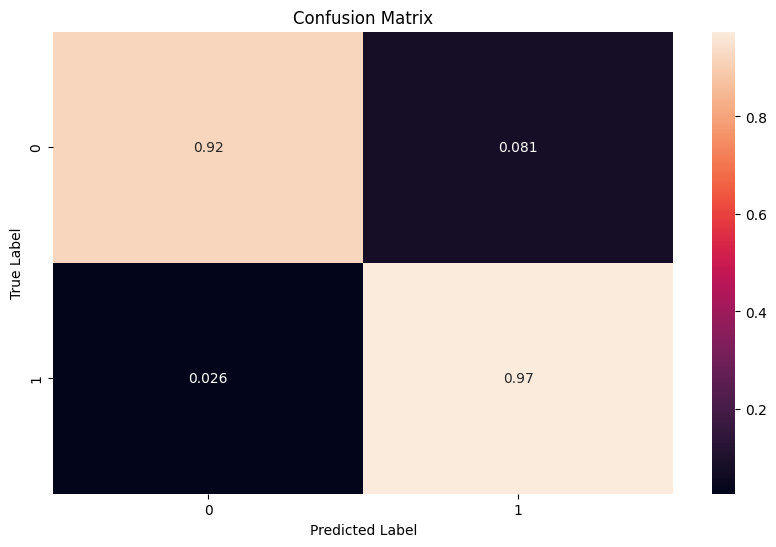

In [168]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#0 = cheetah, 1 = Lion


cf_matrix = confusion_matrix(y_test, y_pred_bool, normalize='true')
plt.figure(figsize = (10,6))

sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 [==============================] - 0s 156ms/step


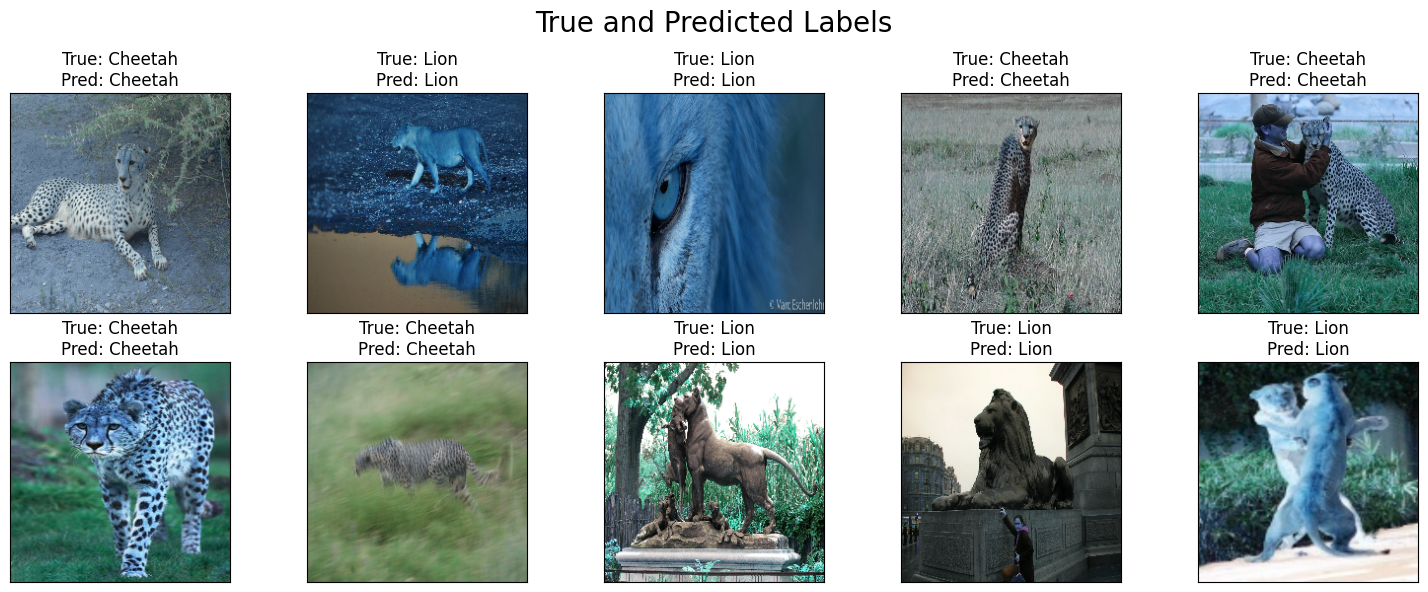

In [411]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Choose a random sample of 10 images from the test set
num_samples = 10
sample_indices = random.sample(range(len(X_test)), num_samples)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions on the sample images
y_pred = model.predict(sample_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Display the sample images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < num_samples:
        ax.imshow(sample_images[i])
        true_label = 'Cheetah' if sample_labels[i] == 0 else 'Lion'
        pred_label = 'Cheetah' if y_pred_labels[i] == 0 else 'Lion'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}')
        
plt.suptitle('True and Predicted Labels', fontsize=20)
plt.tight_layout()
plt.show()


# KNN Model

In [115]:
# from sklearn.preprocessing import StandardScaler
# # #KNN
# # Convert images into feature vectors
# X_train_features = model.predict(X_train)
# X_val_features = model.predict(X_val)
# X_test_features = model.predict(X_test)

# # Standardize the feature vectors
# scaler = StandardScaler()
# X_train_features = scaler.fit_transform(X_train_features)
# X_val_features = scaler.transform(X_val_features)
# X_test_features = scaler.transform(X_test_features)


3/3 [==============================] - 1s 293ms/step


In [116]:
# #KNN
# # Train a KNN classifier on the feature vectors
# knn = KNeighborsClassifier(n_neighbors=2)
# knn.fit(X_train_features, y_train)

KNeighborsClassifier(n_neighbors=2)

In [117]:
# #KNN
# # Evaluate the KNN classifier
# accuracy = knn.score(X_test_features, y_test)
# print("Accuracy: {:.2f}%".format(accuracy*100))
# model.summary()

Accuracy: 90.67%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [118]:
# model.evaluate(X_test,y_test)

3/3 [==============================] - 1s 287ms/step - loss: 0.2648 - acc: 0.8933


[0.2648242712020874, 0.8933333158493042]

In [128]:
# from sklearn.metrics import classification_report

# # Get the predicted labels
# y_pred = knn.predict(X_test_features)

# # Get the classification report
# report = classification_report(y_test, y_pred)

# # Print the classification report
# print("Classification Report:")
# print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.92      0.89      0.91        38

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.91      0.91      0.91        75



3/3 [==============================] - 1s 279ms/step


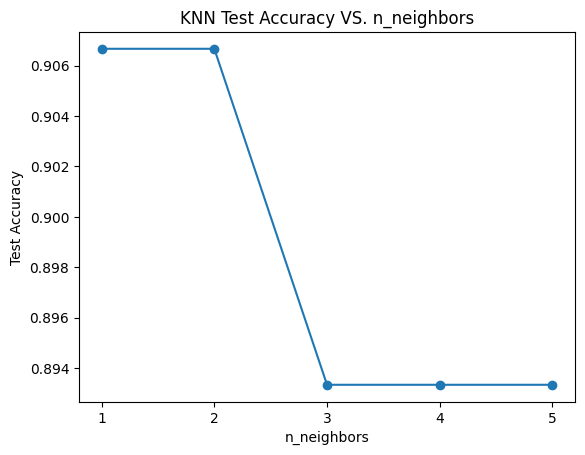

In [135]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Convert images into feature vectors
# X_train_features = model.predict(X_train)
# X_val_features = model.predict(X_val)
# X_test_features = model.predict(X_test)

# # Standardize the feature vectors
# scaler = StandardScaler()
# X_train_features = scaler.fit_transform(X_train_features)
# X_val_features = scaler.transform(X_val_features)
# X_test_features = scaler.transform(X_test_features)

# # Train and evaluate multiple KNN classifiers with different values of n_neighbors
# n_neighbors_list = [1, 2, 3, 4, 5]
# test_accuracies = []
# for n_neighbors in n_neighbors_list:
#     knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#     knn.fit(X_train_features, y_train)
#     y_pred = knn.predict(X_test_features)
#     test_acc = accuracy_score(y_test, y_pred)
#     test_accuracies.append(test_acc)

# # Plot the test accuracies for different values of n_neighbors
# plt.plot(n_neighbors_list, test_accuracies, marker='o')
# plt.title('KNN Test Accuracy VS. n_neighbors')
# plt.xlabel('n_neighbors')
# plt.ylabel('Test Accuracy')
# plt.xticks(n_neighbors_list)
# plt.show()


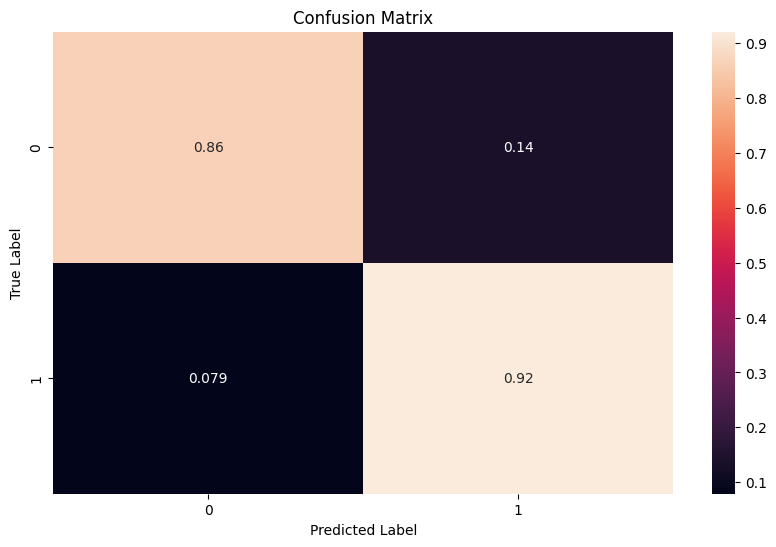

In [134]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# #0 = cheetah, 1 = Lion
# #for KNN

# y_pred = knn.predict(X_test_features)
# cf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
# plt.figure(figsize = (10,6))

# sns.heatmap(cf_matrix, annot=True, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
# plt.title('Normalized Confusion Matrix')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()


# Show some of result

1/1 [==============================] - 0s 130ms/step


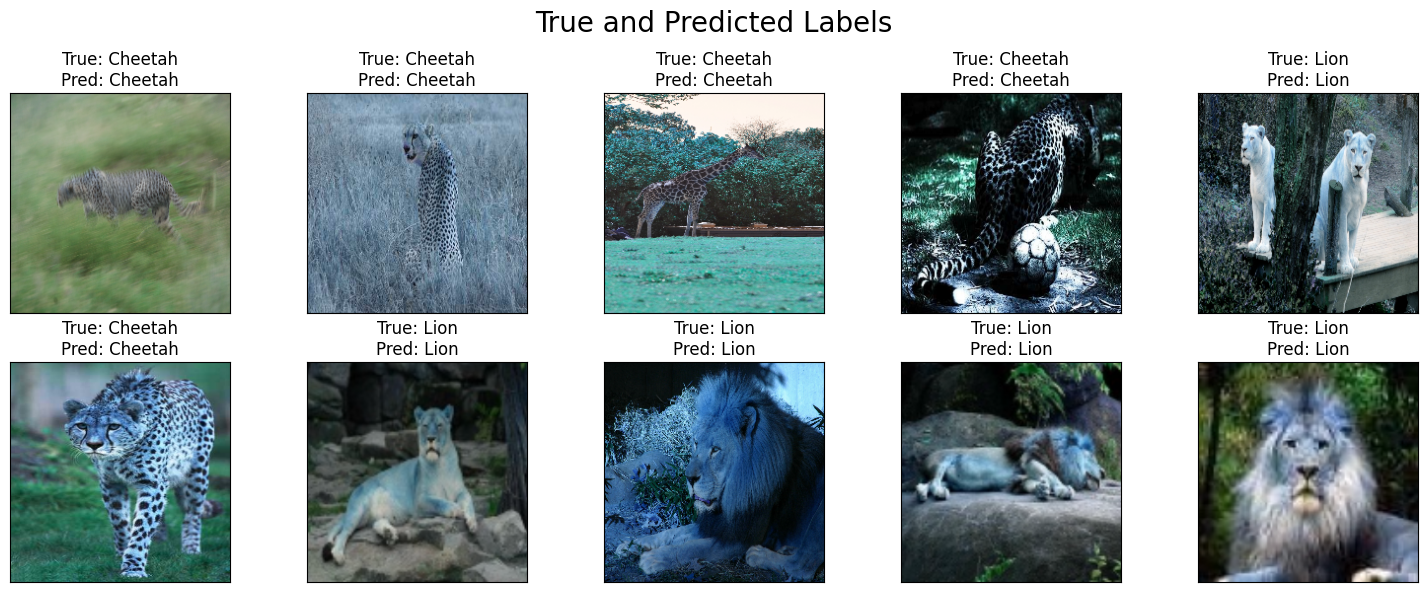

In [48]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Choose a random sample of 10 images from the test set
num_samples = 10
sample_indices = random.sample(range(len(X_test)), num_samples)
sample_images = X_test[sample_indices]
sample_labels = y_test[sample_indices]

# Make predictions on the sample images
y_pred = model.predict(sample_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Display the sample images with their true and predicted labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    if i < num_samples:
        ax.imshow(sample_images[i])
        true_label = 'Cheetah' if sample_labels[i] == 0 else 'Lion'
        pred_label = 'Cheetah' if y_pred_labels[i] == 0 else 'Lion'
        ax.set_title(f'True: {true_label}\nPred: {pred_label}')
        
plt.suptitle('True and Predicted Labels', fontsize=20)
plt.tight_layout()
plt.show()
